In [95]:
#Importing required packages
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [96]:
data = pd.read_excel(r'Downloads\segment1.xlsx')

In [97]:
high = data[data.earning_level == 'High earner']

In [98]:
low = data[data.earning_level == 'Low earner']

In [99]:
med = data[data.earning_level == 'Medium earner']

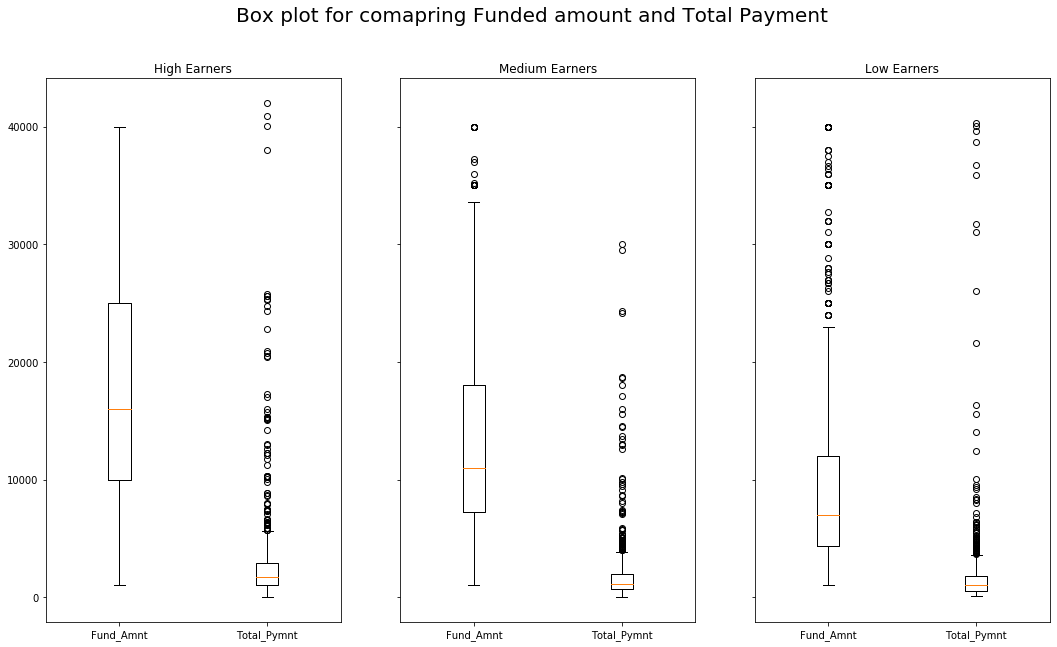

In [100]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,sharey =True)
data = [high.funded_amnt,high.total_pymnt]
ax1.boxplot(data)
ax1.set_xticklabels(['Fund_Amnt', 'Total_Pymnt'])
ax1.get_xaxis().tick_bottom()
data = [med.funded_amnt,med.total_pymnt]
ax2.boxplot(data)
ax2.set_xticklabels(['Fund_Amnt', 'Total_Pymnt'])
ax2.get_xaxis().tick_bottom()
data = [low.funded_amnt,low.total_pymnt]
ax3.boxplot(data)
ax3.set_xticklabels(['Fund_Amnt', 'Total_Pymnt'])
ax3.get_xaxis().tick_bottom()
ax1.title.set_text('High Earners')
ax2.title.set_text('Medium Earners')
ax3.title.set_text('Low Earners')
figure.suptitle('Box plot for comapring Funded amount and Total Payment', fontsize=20)
plt.show()

In [101]:
data = pd.read_excel(r'Downloads\segment1.xlsx')

In [102]:
data.shape

(2734, 28)

In [103]:
data = data.drop(["emp_title","grade", "addr_state","earning_level","region"], axis = 1)

In [104]:
data.shape

(2734, 23)

In [105]:
data.head()

,loan_amnt,funded_amnt,int_rate,home_ownership,annual_inc,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,...,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,avg_cur_bal,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,hardship_flag
0,2800,2800,20.89,RENT,85000.0,Current,0,0,1,32574,...,577,36170,3596,5734,1573,60.0,1,71186,36170,N
1,35000,35000,24.37,MORTGAGE,85000.0,Current,0,0,0,14115,...,0,726980,42176,5109,103854,100.0,0,738731,56291,N
2,20000,20000,11.80,RENT,85000.0,Current,0,0,0,26235,...,0,40746,14511,5413,3395,50.0,0,61041,40746,N
3,18000,18000,8.81,MORTGAGE,85000.0,Current,0,1,1,14739,...,0,32053,17314,5479,2290,0.0,1,85993,32053,N
4,3500,3500,16.91,RENT,85000.0,Current,0,1,0,13217,...,0,35752,22535,7204,5959,100.0,0,43490,35752,N


In [106]:
cleanup_nums = {"home_ownership": {'MORTGAGE' : 1, 'RENT' : 2, 'OWN' : 3, 'ANY' : 4},
                "loan_status":     {'Current' : 1, 'Fully Paid' : 2, 'Late (31-120 days)' : 3 , 'In Grace Period' : 4,'Late (16-30 days)': 5 , 'Charged Off': 6, 'Default': 0 },
                 "hardship_flag": {'N': 0, 'Y': 1}}
data.replace(cleanup_nums, inplace=True)
data.head()

,loan_amnt,funded_amnt,int_rate,home_ownership,annual_inc,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,...,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,avg_cur_bal,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,hardship_flag
0,2800,2800,20.89,2,85000.0,1,0,0,1,32574,...,577,36170,3596,5734,1573,60.0,1,71186,36170,0
1,35000,35000,24.37,1,85000.0,1,0,0,0,14115,...,0,726980,42176,5109,103854,100.0,0,738731,56291,0
2,20000,20000,11.80,2,85000.0,1,0,0,0,26235,...,0,40746,14511,5413,3395,50.0,0,61041,40746,0
3,18000,18000,8.81,1,85000.0,1,0,1,1,14739,...,0,32053,17314,5479,2290,0.0,1,85993,32053,0
4,3500,3500,16.91,2,85000.0,1,0,1,0,13217,...,0,35752,22535,7204,5959,100.0,0,43490,35752,0


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
linear_reg_data = data
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
y_train =y_train.astype('int')
y_test = y_test.astype('int')
logmodel = LogisticRegression(random_state=0, solver='lbfgs',  multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       780
           2       0.94      0.94      0.94        33
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.98       821
   macro avg       0.32      0.32      0.32       821
weighted avg       0.98      0.98      0.98       821

[[777   2   1   0   0   0]
 [  2  31   0   0   0   0]
 [  4   0   0   0   0   0]
 [  2   0   0   0   0   0]
 [  1   0   0   0   0   0]
 [  1   0   0   0   0   0]]
0.9841656516443362


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Feature: 0, Score: 0.00018
Feature: 1, Score: 0.00018
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00002
Feature: 5, Score: -0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00008
Feature: 9, Score: 0.00001
Feature: 10, Score: -0.00053
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00001
Feature: 13, Score: 0.00002
Feature: 14, Score: -0.00003
Feature: 15, Score: 0.00011
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00007
Feature: 21, Score: 0.00000


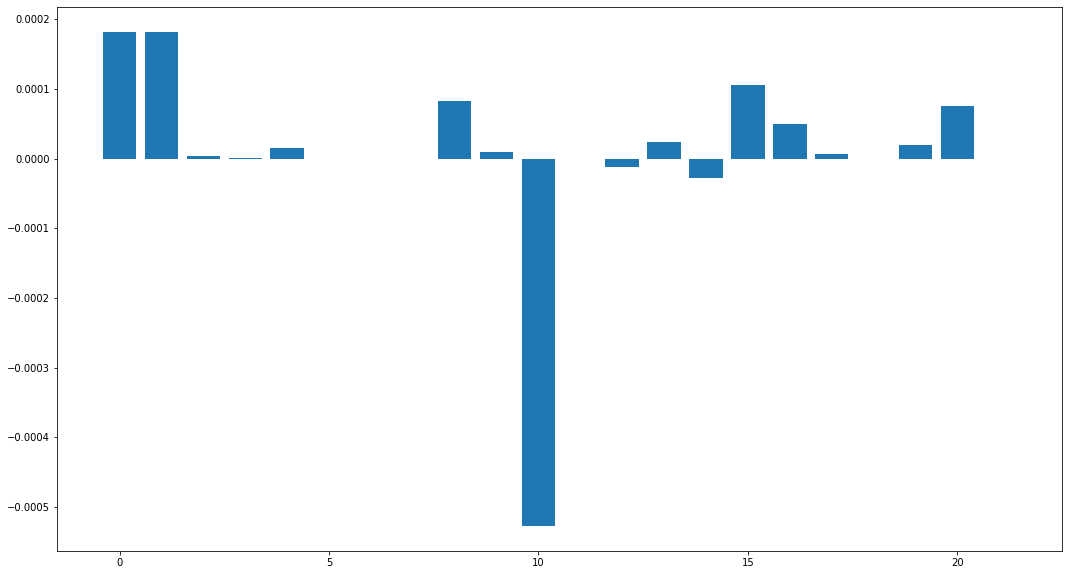

In [108]:
from matplotlib import pyplot
importance = logmodel.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [109]:
linear_reg_data.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'home_ownership', 'annual_inc',
       'loan_status', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_bal',
       'revol_util', 'total_pymnt', 'total_rec_late_fee', 'tot_coll_amt',
       'tot_cur_bal', 'total_bal_il', 'max_bal_bc', 'avg_cur_bal',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'hardship_flag'],
      dtype='object')